# Universal Sentence Encoder

**Acknowledgements:**
1. Tutorial on Colab.  
2. Notebook on Github.  


**References:**
1. TF resources:
   1. [Universal Sentence Encoder module](https://tfhub.dev/google/universal-sentence-encoder/4)  
   2. [Universal Sentence Encoder - Large module](https://tfhub.dev/google/universal-sentence-encoder-large/5)  
   3. [universal-sentence-encoder family](https://tfhub.dev/google/collections/universal-sentence-encoder/1)  
2. Semantic textual similarity:
   1. [STS Benchmark](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) 
   2. [STS Benchmark dataset file](http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz)  
   3. [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)  
3. [Universal Sentence Encoder](https://arxiv.org/abs/1803.11175) paper.  


**Table of contents:**
1. [Setup](#Setup)  
2. [Load module](#Load-module)  
3. [Utility functions](#Utility-functions)  
4. [Embedding text](#Embedding-text)  
5. [Semantic textual similarity task](#Semantic-textual-similarity-task)
   1. [Similarity visualized](#Similarity-visualized)  
6. [Evaluation: STS Benchmark](#Evaluation:-STS-Benchmark)  
   1. [Download data](#Download-data)  
   2. [Evaluate sentence embeddings](#Evaluate-sentence-embeddings)  

## Setup

In [1]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

/home/ivogeorg/anaconda3/envs/tf-22/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ivogeorg/anaconda3/envs/tf-22/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ivogeorg/anaconda3/envs/tf-22/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ivogeorg/anaconda3/envs/tf-22/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ivogeorg/anaconda3/envs/tf-22/lib/python3.7/importlib/_boo

## Load module

In [2]:
module_urls = [
   'https://tfhub.dev/google/universal-sentence-encoder/4',
   'https://tfhub.dev/google/universal-sentence-encoder-large/5'
]

module_select = 0

model = hub.load(module_urls[module_select])
print('Module {} loaded.'.format(module_urls[module_select]))

Module https://tfhub.dev/google/universal-sentence-encoder/4 loaded.


## Utility functions

In [3]:
def embed(input):
    return model(input)

## Embedding text

In [4]:
# Compute a representation (embedding) for each text
# Various lengths are supported
word = 'Embedding'
sentence = 'I am a sentence and I want to get an embedding.'
paragraph = (
    'Universal Sentence Encoder embeggins also support short paragraphs. '
    'There is no hard bound on the paragraph length, though, roughly, '
    'the longer the paragraph, the more "diluted" the embeddings will be.'
    )
messages = [word, sentence, paragraph]

# Reduce logging output
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print('Message: {}'.format(messages[i]))
    print('Embedding size: {}'.format(len(message_embedding)))
    message_embedding_snippet = ', '.join(
        (str(x) for x in message_embedding[:3]))
    print('Embedding: [{}, ...]\n'.format(message_embedding_snippet))

Message: Embedding
Embedding size: 512
Embedding: [-0.0321541354060173, 0.03428849205374718, 0.018950264900922775, ...]

Message: I am a sentence and I want to get an embedding.
Embedding size: 512
Embedding: [0.06377379596233368, -0.04271828010678291, 0.022188344970345497, ...]

Message: Universal Sentence Encoder embeggins also support short paragraphs. There is no hard bound on the paragraph length, though, roughly, the longer the paragraph, the more "diluted" the embeddings will be.
Embedding size: 512
Embedding: [-0.02276337519288063, -0.031148700043559074, 0.02329954318702221, ...]



## Semantic textual similarity task

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can thus be trivially computer as the *inner product of the embeddings (aka encodings)*.

In [5]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(corr,
                    xticklabels=labels,
                    yticklabels=labels,
                    vmin=0,
                    vmax=1,
                    cmap='YlOrRd')
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title('Semantic Textual Similarity')
    

def run_and_plot(messages_):
    message_embeddings_ = embed(messages_)
    plot_similarity(messages_, message_embeddings_, 90)

### Similarity visualized

Similarity shown as a *heat map*. Each entry [i, j] of the 9x9 matrix is colored according to the *inner product of the encodings for sentence i and j*.

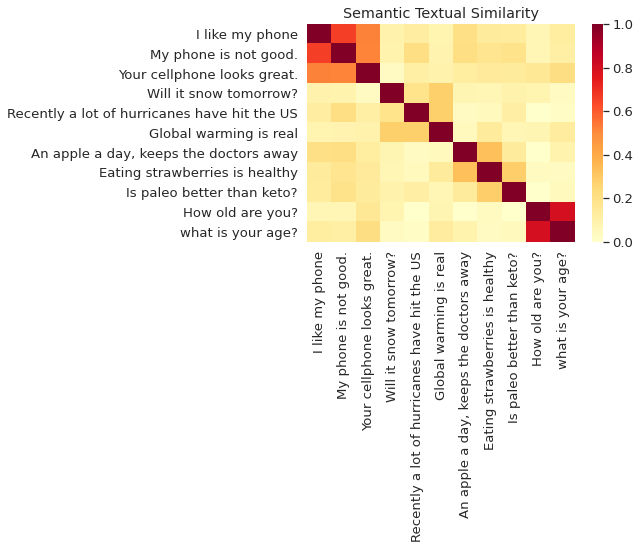

In [6]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

## Evaluation: STS Benchmark

STS = Semantic Textual Similarity

The [STS Benchmark](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) provides an intrinsic evaluation of the degree to which similarity scores computer using sentence embeddings align with human judgements. The benchmark requires systems to return similarity scores for a diverse selection of sentence pairs. [Pearson correlation]() is then used to evaluate the quality of the machine similarity scores against human judgements.

Interesting and relatively recent paper: [Unsupervised Random Walk Sentence Embeddings: A Strong but Simple Baseline (Ethayarajh, 2018)](https://www.aclweb.org/anthology/W18-3012.pdf).

### Download data

In [7]:
import pandas
import scipy
import math
import csv

In [8]:
sts_dataset_url = 'http://ixa2.si.ehu.es/stswiki/images/4/48/Stsbenchmark.tar.gz'

sts_dataset = tf.keras.utils.get_file(
    fname='Stsbenchmark.tar.gz',
    origin=sts_dataset_url,
    extract=True)

sts_dev = pandas.read_table(
    os.path.join(os.path.dirname(sts_dataset),
                 'stsbenchmark',
                 'sts-dev.csv'),
    error_bad_lines=False,
    skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=['sim', 'sent_1', 'sent_2'])

# Cleanup some NaN values in sts_dev

sts_dev = sts_dev[[isinstance(s, str) for s in sts_dev['sent_2']]]

sts_test = pandas.read_table(
    os.path.join(os.path.dirname(sts_dataset),
                 'stsbenchmark',
                 'sts-test.csv'),
    error_bad_lines=False,
    quoting=csv.QUOTE_NONE,  # TODO: ?
    skip_blank_lines=True,
    usecols=[4, 5, 6],
    names=['sim', 'sent_1', 'sent_2'])

417792/409630 [==============================] - 1s 2us/step


### Evaluate sentence embeddings

In [11]:
sts_data_options = [sts_dev, sts_test]
sts_data_selector = 0
sts_data = sts_data_options[sts_data_selector]

def run_sts_benchmark(batch):
    sts_encode1 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_1'].tolist())),
                                     axis=1)
    sts_encode2 = tf.nn.l2_normalize(embed(tf.constant(batch['sent_2'].tolist())),
                                     axis=1)
    
    cosine_similarities = tf.reduce_sum(tf.multiply(sts_encode1, sts_encode2),
                                        axis=1)
    clip_cosine_similarities = tf.clip_by_value(cosine_similarities, -1.0, 1.0)
    scores = 1.0 - tf.acos(clip_cosine_similarities)  # TODO: grok this
    
    # returns the similarity scores
    return scores


dev_scores = sts_data['sim'].tolist()
scores = []
for batch in np.array_split(sts_data, 10):
    scores.extend(run_sts_benchmark(batch))
    
pearson_correlation = scipy.stats.pearsonr(scores, dev_scores)
print('Pearson correlation coefficient = {0}\np-value = {1}'.format(
    pearson_correlation[0], pearson_correlation[1]))

Pearson correlation coefficient = 0.8036394653167649
p-value = 0.0
